In [31]:
import pandas as pd

In [32]:
call_df = pd.read_csv("/content/CallCounts.csv")
call_df = call_df.drop('Unnamed: 0', axis = 1)
call_df.head()

,CallCountsPerHour
0,65
1,61
2,66
3,61
4,54


In [33]:
call_df.shape

(6240, 1)

In [34]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6240 entries, 0 to 6239
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CallCountsPerHour  6240 non-null   int64
dtypes: int64(1)
memory usage: 48.9 KB


In [35]:
call_df.describe()

,CallCountsPerHour
count,6240.000000
mean,59.791987
std,7.779272
min,34.000000
25%,54.000000
50%,60.000000
75%,65.000000
max,87.000000


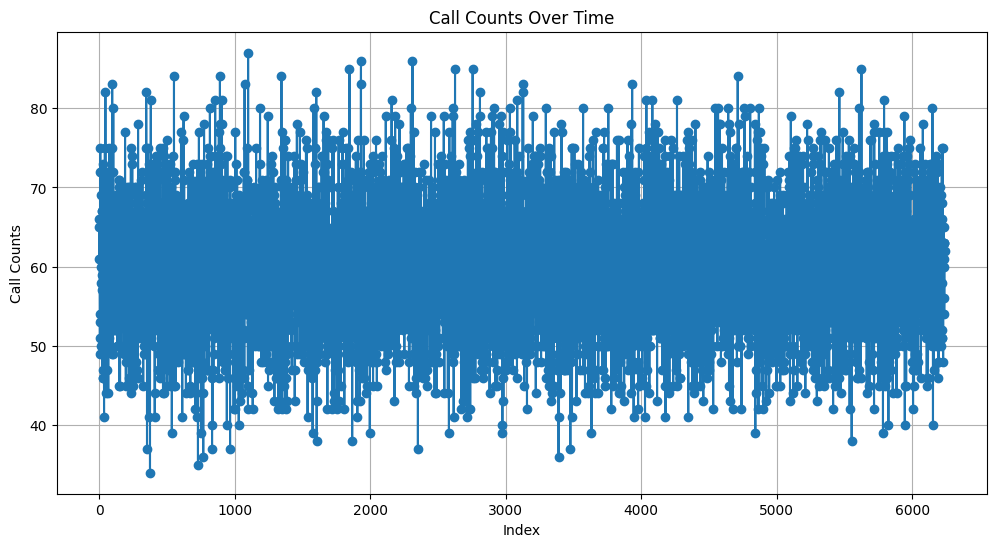

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
call_df = pd.read_csv('CallCounts.csv')

# Visualize the call counts over time using a line plot
plt.figure(figsize=(12, 6))
plt.plot(call_df.index, call_df['CallCountsPerHour'], marker='o')
plt.xlabel('Index')
plt.ylabel('Call Counts')
plt.title('Call Counts Over Time')
plt.grid(True)
plt.show()

The code plots the call counts against the index of the DataFrame, which is representing the order of the data points. This can give us  a sense of the overall trend or any patterns in the call counts over time.

<ipython-input-37-c787d7bf5cb0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(call_df['CallCountsPerHour'], kde=True, bins=20)


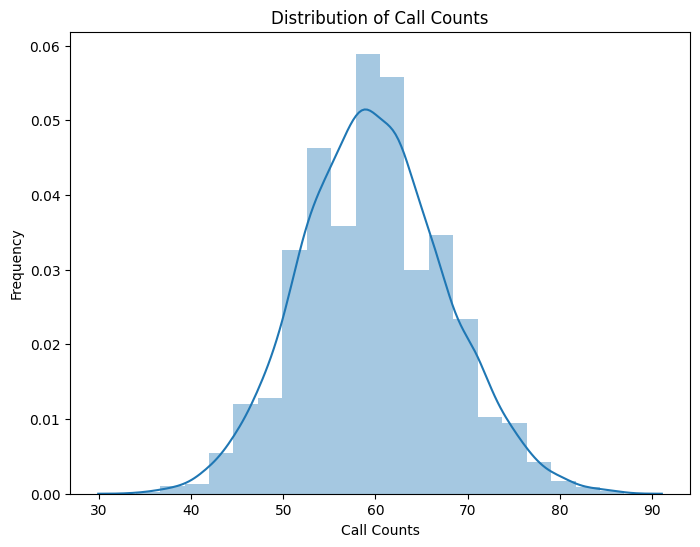

In [37]:
import seaborn as sns

# Plot the distribution of call counts
plt.figure(figsize=(8, 6))
sns.distplot(call_df['CallCountsPerHour'], kde=True, bins=20)
plt.xlabel('Call Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Call Counts')
plt.show()


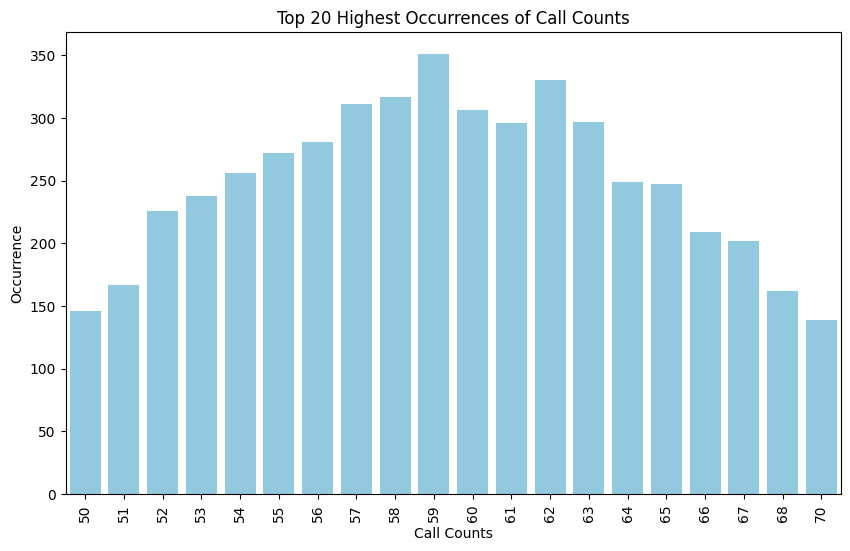

    Call Counts  Occurrence
0            59         351
1            62         330
2            58         317
3            57         311
4            60         306
5            63         297
6            61         296
7            56         281
8            55         272
9            54         256
10           64         249
11           65         247
12           53         238
13           52         226
14           66         209
15           67         202
16           51         167
17           68         162
18           50         146
19           70         139


In [38]:
# Get the top 20 highest occurrences

call_counts_occurrence = call_df['CallCountsPerHour'].value_counts()
top_20_occurrences = call_counts_occurrence.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_occurrences.index, y=top_20_occurrences.values, color='skyblue')
plt.xlabel('Call Counts')
plt.ylabel('Occurrence')
plt.title('Top 20 Highest Occurrences of Call Counts')
plt.xticks(rotation=90)
plt.show()

# Tabulate the top 20 highest occurrences
top_20_occurrences_df = pd.DataFrame({'Call Counts': top_20_occurrences.index,
                                     'Occurrence': top_20_occurrences.values})
print(top_20_occurrences_df)

**Conclusion:** The Highest frequency of call counts are all above than 50 and less than 70.

## **Hypothesis Testing**

*   H0: There is no significant difference in call counts between different hours of the day.
*   H1: There is a significant difference in call counts between different hours of the day.



One-sample t-test - t-statistic: -408.2873818889281
One-sample t-test - p-value: 0.0


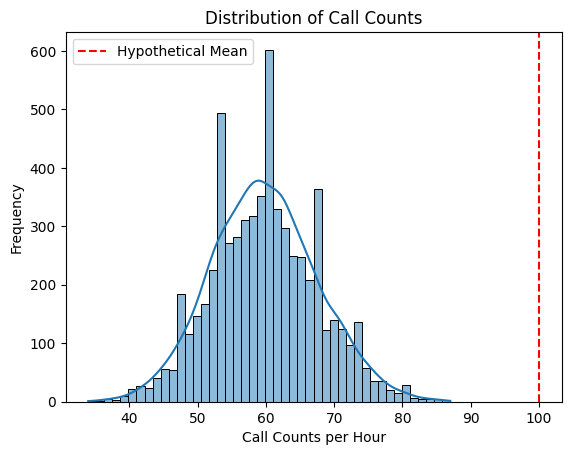

In [39]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Hypothetical mean call count (H0: mu = 100)
hyp_mean = 100

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(call_df['CallCountsPerHour'], hyp_mean)
print("One-sample t-test - t-statistic:", t_statistic)
print("One-sample t-test - p-value:", p_value)

# Visualize the distribution of call counts
sns.histplot(call_df['CallCountsPerHour'], kde=True)
plt.axvline(hyp_mean, color='red', linestyle='--', label='Hypothetical Mean')
plt.xlabel('Call Counts per Hour')
plt.ylabel('Frequency')
plt.title('Distribution of Call Counts')
plt.legend()
plt.show()


**Conclusion:** 

1. The t-statistic value of -408.29 indicates the magnitude and direction of the difference between the sample mean and the hypothetical mean (100). The negative sign suggests that the sample mean is significantly lower than the hypothetical mean.
2. The extremely low p-value suggests strong evidence to reject the null hypothesis and conclude that there is a significant difference between the sample mean call counts and the hypothetical mean.

# **Fitting the Distribution and comparitive analysis between game, beta, norm and lognorm.**

In [40]:
import numpy as np
import scipy.stats as stats

call_counts = call_df['CallCountsPerHour']

# Fit different distributions and evaluate their goodness of fit
distributions = ['norm', 'beta', 'gamma', 'lognorm']
best_fit_dist = None
best_fit_params = None
best_fit_sse = np.inf  

total_params = {}
total_sse = {}
for dist_name in distributions:
    dist = getattr(stats, dist_name)
    params = dist.fit(call_counts)
    cdf = dist.cdf(call_counts, *params)
    sse = np.sum((cdf - np.arange(len(call_counts))/float(len(call_counts)))**2)
    
    # if the current distribution has a lower sum of squared errors (SSE) than the previous best fit
    if sse < best_fit_sse:
        best_fit_dist = dist_name
        best_fit_params = params
        best_fit_sse = sse
    
    total_params[dist_name] = params
    total_sse[dist_name] = sse

print("Best-fitting Distribution:", best_fit_dist)
print("Best-fitting Parameters:", best_fit_params)


Best-fitting Distribution: beta
Best-fitting Parameters: (70.33241352606507, 193.62282430734604, -16.51755441589603, 286.3883624457537)


**How to determine the best fitting distribution?**
1.  By comparing the sum of squared errors (SSE) for different distributions. Lowest SSE is the better one.
2.  You can also visually compare the fitted distribution curves with the actual data using a histogram or a probability plot.

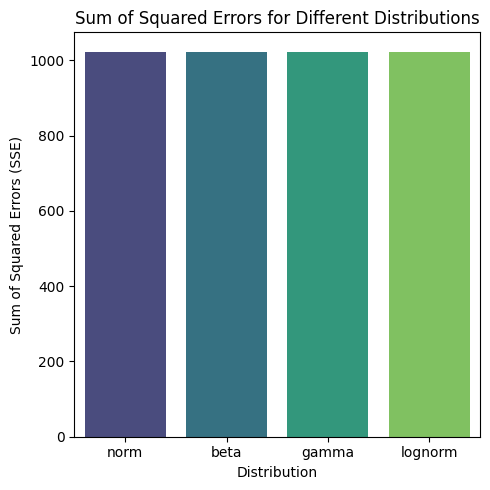

In [41]:
# Convert the dictionary to a DataFrame
df_total_sse = pd.DataFrame.from_dict(total_sse, orient='index', columns=['SSE'])
df_total_sse.reset_index(inplace=True)
df_total_sse = df_total_sse.rename(columns={'index': 'Distribution'})

# Plot the SSE using a bar plot
plt.figure(figsize=(5, 5))
sns.barplot(data=df_total_sse, x='Distribution', y='SSE', palette='viridis')
plt.xlabel('Distribution')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Sum of Squared Errors for Different Distributions')
plt.tight_layout()
plt.show()